<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_105/blob/main/Actividad_semanal_4_A00819828_y_A001794035.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías necesarias y datos de ejemplo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#Define DB link
input = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

#Transform into DF
InitialDF = pd.read_csv(input)
InitialDF

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [2]:
#First we add labels to the columns of the dataframe
InitialDF.rename(columns = {'X1' : 'Credito_otorgado','X2' : 'Genero','X3' : 'Nivel_Educativo','X4' : 'Estatus_civil','X5' : 'Edad','X6' : 'Pago_Septiembre','X7' : 'Pago_Agosto',
                          'X8' : 'Pago_Julio','X9' : 'Pago_Junio','X10' : 'Pago_Mayo','X11' : 'Pago_Abril','X12' : 'Cantidad_por_pagar_Septiembre','X13' : 'Cantidad_por_pagar_Agosto','X14' : 'Cantidad_por_pagar_Julio',
                          'X15' : 'Cantidad_por_pagar_Junio','X16' : 'Cantidad_por_pagar_Mayo','X17' : 'Cantidad_por_pagar_Abril','X18' : 'Cantidad_pagada_Septiembre','X19' : 'Cantidad_pagada_Agosto','X20' : 'Cantidad_pagada_Julio',
                          'X21' : 'Cantidad_pagada_Junio', 'X22' : 'Cantidad_pagada_Mayo','X23' : 'Cantidad_pagada_Abril','Y' : 'Confirmacion_de_pago_credito'}, inplace = True)
InitialDF

#Then we do histograms to identify if the numbers are continuos or discrete

#Histograms = InitialDF.hist(bins=30, figsize=(25, 25))
#Histograms

,ID,Credito_otorgado,Genero,Nivel_Educativo,Estatus_civil,Edad,Pago_Septiembre,Pago_Agosto,Pago_Julio,Pago_Junio,...,Cantidad_por_pagar_Junio,Cantidad_por_pagar_Mayo,Cantidad_por_pagar_Abril,Cantidad_pagada_Septiembre,Cantidad_pagada_Agosto,Cantidad_pagada_Julio,Cantidad_pagada_Junio,Cantidad_pagada_Mayo,Cantidad_pagada_Abril,Confirmacion_de_pago_credito
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [3]:
#Based on the distributions, we can identify which of the columns are used as numerical categories variables, which should not be used for the PCA exercise
InitialDF.drop(['ID','Genero','Nivel_Educativo','Estatus_civil','Pago_Septiembre','Pago_Agosto','Pago_Julio','Pago_Junio','Pago_Mayo','Pago_Abril','Confirmacion_de_pago_credito'], inplace=True, axis=1)
InitialDF

,Credito_otorgado,Edad,Cantidad_por_pagar_Septiembre,Cantidad_por_pagar_Agosto,Cantidad_por_pagar_Julio,Cantidad_por_pagar_Junio,Cantidad_por_pagar_Mayo,Cantidad_por_pagar_Abril,Cantidad_pagada_Septiembre,Cantidad_pagada_Agosto,Cantidad_pagada_Julio,Cantidad_pagada_Junio,Cantidad_pagada_Mayo,Cantidad_pagada_Abril
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [4]:
#Normalize the columns that are left

scaler = MinMaxScaler()
NormalizedDF = pd.DataFrame.copy(InitialDF)
NormalizedDF= pd.DataFrame(scaler.fit_transform(InitialDF))
NormalizedDF = pd.DataFrame(data=NormalizedDF.values, columns=InitialDF.columns)
NormalizedDF

,Credito_otorgado,Edad,Cantidad_por_pagar_Septiembre,Cantidad_por_pagar_Agosto,Cantidad_por_pagar_Julio,Cantidad_por_pagar_Junio,Cantidad_por_pagar_Mayo,Cantidad_por_pagar_Abril,Cantidad_pagada_Septiembre,Cantidad_pagada_Agosto,Cantidad_pagada_Julio,Cantidad_pagada_Junio,Cantidad_pagada_Mayo,Cantidad_pagada_Abril
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29996,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29997,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29998,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


0     0.414121
1     0.319481
2     0.182702
3     0.020494
4     0.017215
5     0.015448
6     0.009316
7     0.006673
8     0.005329
9     0.003691
10    0.002180
11    0.001649
12    0.001125
13    0.000576
Name: Proportion of variance, dtype: float64


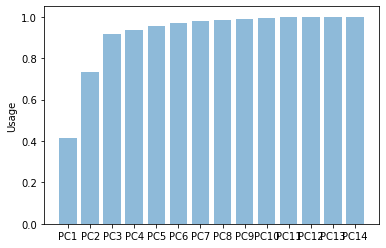

In [5]:
#Start PCA
pcs = PCA()
pcs.fit(NormalizedDF.iloc[:, :].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

y_pos = y_pos = np.arange(len(pcsSummary_df['Proportion of variance']))

print(pcsSummary_df['Proportion of variance'])

plt.bar(y_pos, pcsSummary_df['Cumulative proportion'], align='center', alpha=0.5)
plt.xticks(y_pos, ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
plt.ylabel('Usage')
sns.set(rc={'figure.figsize':(16,16)})
plt.show()

#plt.bar(10, performance, align='center', alpha=0.5)

In [6]:
#Components de PCS
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), index = NormalizedDF.columns)
pcsComponents_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Credito_otorgado,0.437689,0.499665,-0.742252,-0.077683,-0.022246,-0.025713,-0.015115,-0.015253,-0.010748,-0.004400,-0.003738,0.004806,-0.001087,-0.000954
Edad,0.823888,-0.555724,0.111087,0.005494,-0.000614,0.002815,0.000090,-0.000421,-0.000417,-0.000188,-0.000196,-0.000243,-0.000047,0.000354
Cantidad_por_pagar_Septiembre,0.165142,0.302368,0.305901,-0.193270,0.424367,-0.229271,0.231435,-0.204391,0.365691,0.088344,0.311211,-0.421606,-0.053281,-0.058362
Cantidad_por_pagar_Agosto,0.171845,0.317995,0.330413,-0.176662,0.328875,-0.160913,0.106120,0.276208,-0.225000,-0.271342,-0.217950,0.493638,0.102279,0.285427
Cantidad_por_pagar_Julio,0.096414,0.178163,0.181051,-0.021422,0.041041,-0.011663,-0.106181,0.104752,-0.246509,0.533543,0.007265,0.244348,0.014401,-0.704454
Cantidad_por_pagar_Junio,0.155113,0.288625,0.286504,0.027338,-0.227009,0.155531,-0.395368,0.137845,0.194152,0.187340,-0.518234,-0.296579,-0.305018,0.190816
Cantidad_por_pagar_Mayo,0.152589,0.284742,0.277915,0.094773,-0.428499,0.260176,0.074034,-0.197322,-0.098717,-0.128446,0.111772,-0.129734,0.676854,-0.001079
Cantidad_por_pagar_Abril,0.112963,0.210851,0.203201,0.240085,-0.331986,-0.025894,-0.020360,-0.231997,-0.136093,-0.259415,0.431792,0.236710,-0.591872,-0.011027
Cantidad_pagada_Septiembre,0.018330,0.028898,0.002481,0.096651,0.028081,0.091742,0.054080,0.711842,-0.322312,-0.244709,0.247158,-0.472937,-0.071838,-0.130183
Cantidad_pagada_Agosto,0.010918,0.016673,-0.002897,0.093443,-0.030661,0.063845,-0.029854,0.222872,-0.031262,0.625638,0.443359,0.124810,0.068703,0.570980


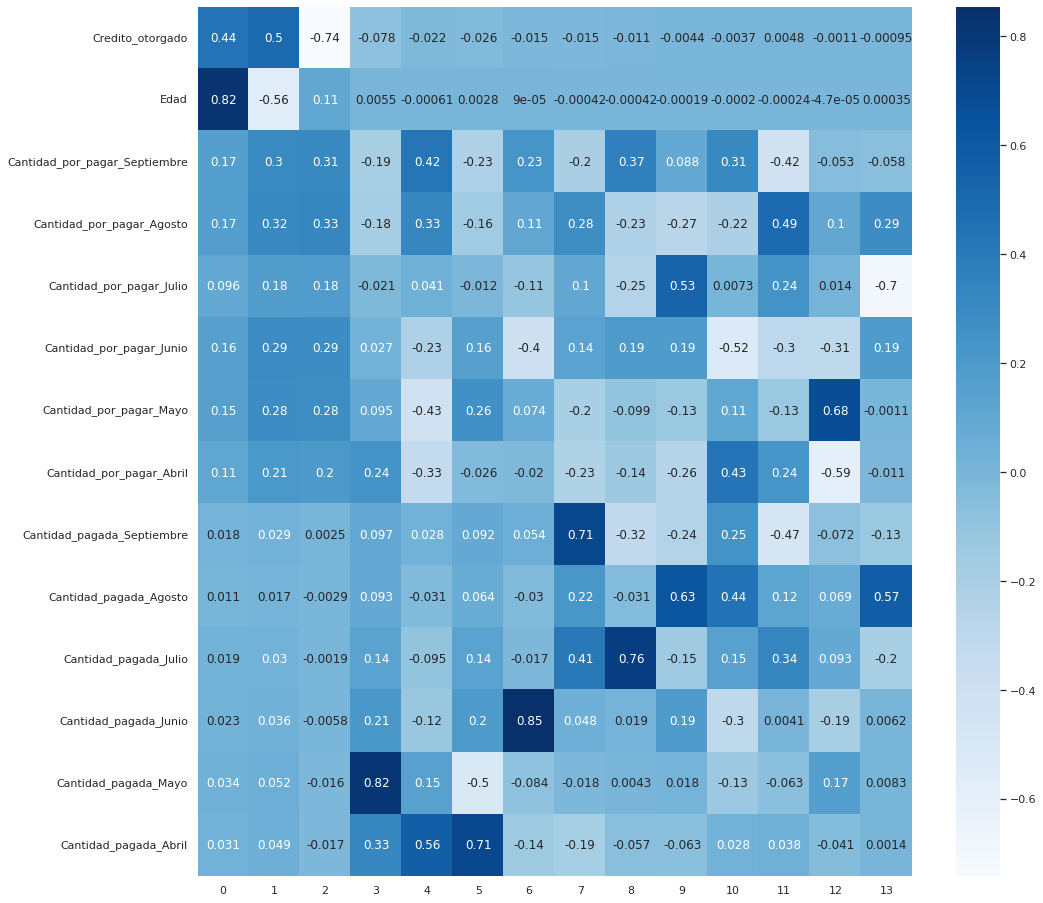

In [7]:
#Heatmap de componentes
heatmap  = sns.heatmap(pcsComponents_df, annot=True,cmap = "Blues")


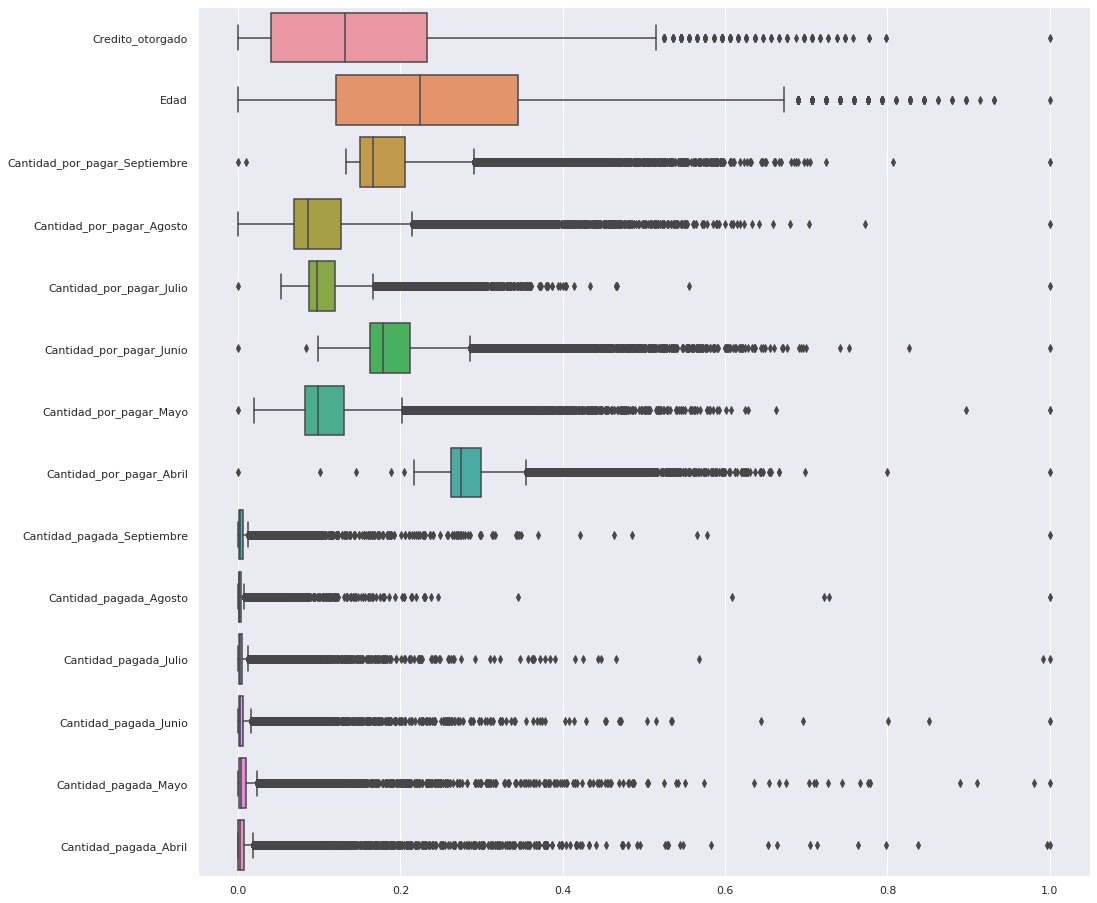

In [8]:
#BoxPlot para puntos atípicos usando matriz normmalizada

sns.boxplot(data=NormalizedDF, orient = "h")

#ListOfColumns = InitialDF.columns.values.tolist()

#for i in range(len(InitialDF.columns)):
  #plt.figure()
  #sns.boxplot(data=InitialDF[ListOfColumns[i]]).set_title(ListOfColumns[i])
  #sns.boxplot(orient="v")
  #print(ListOfColumns[i])



####Preguntas

**¿Cuál es el número de componentes mínimo y por qué?**

R= Suponiendo que podemos aplicar una relación de pareto 80/20, el mínimo de componentes en este caso son 3, por que la varianza acumulada de estas 3 variables es cercana al .90

**¿Cuál es la variación de los datos que representan esos componentes?**

R= 

Comp----variación

0-----------0.414121

1-----------0.319481

2-----------0.182702

**¿Cuál es la pérdida de información después de realizar PCA?**

R=

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

R=

Component 1: Edad
Componente 2: Crédito Otorgado
Componente 3: Cantidad a pagar en Agosto

**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

R= PCA es útil para saber que variables pudiesen ser redundantes a la hora de hacer un modelo, la redundancia se mide en función a que tan bien las variables "agrupan" a los datos, si los datos se agrupan relativamente bien con las variables cuya variación acumulada es suficiente, se puede decir que las demás variables no añaden ningún valor extra al modelo, por lo tanto por temas de ahorro computacionales y para llegar a un modelo óptimo más pronto, conviene hacer este tipo de análisis en variables numéricas.
